## Binary Classification Example

These codes have been updated to work with Tensorflow 2.0. It will not work with previous versions.


In [0]:
import numpy as np

try:
  # %tensorflow_version only existis in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf 
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
y_train[0]

5

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

## Data Preparation

In [0]:
import numpy as np

In [0]:
tf.keras.backend.image_data_format()

'channels_last'

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
y_train = np.where(y_train != 5, 0, 1)
# not digit 5, then y target convert to 0
# if it is digit 5, then y targer is 1

In [0]:
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

In [0]:
y_train.shape

(60000,)

## Network Architecture

In [0]:
batch_size = 128
num_classes = 1
epochs = 10

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Dense(128, 
                activation='relu',
                input_shape=input_shape))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(num_classes, 
                activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 128)       256       
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 100353    
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


## Loss Function and Optimisers

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Measure the Performance of the NN

In [0]:
x_val = x_train[50000:]
x_train_1 = x_train[:50000]

In [0]:
y_val = y_train[50000:]
y_train_1 = y_train[:50000]

In [0]:
history = model.fit(x_train_1,
                    y_train_1,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 156us/sample - loss: 0.2492 - accuracy: 0.9095 - val_loss: 0.1981 - val_accuracy: 0.9138
Epoch 2/10
50000/50000 [==============================] - 6s 122us/sample - loss: 0.1757 - accuracy: 0.9298 - val_loss: 0.1567 - val_accuracy: 0.9400
Epoch 3/10
50000/50000 [==============================] - 6s 122us/sample - loss: 0.1482 - accuracy: 0.9454 - val_loss: 0.1372 - val_accuracy: 0.9533
Epoch 4/10
50000/50000 [==============================] - 6s 121us/sample - loss: 0.1339 - accuracy: 0.9528 - val_loss: 0.1267 - val_accuracy: 0.9586
Epoch 5/10
50000/50000 [==============================] - 6s 125us/sample - loss: 0.1254 - accuracy: 0.9570 - val_loss: 0.1205 - val_accuracy: 0.9627
Epoch 6/10
50000/50000 [==============================] - 6s 124us/sample - loss: 0.1198 - accuracy: 0.9596 - val_loss: 0.1161 - val_accuracy: 0.9640
Epoch 7/10
50000/50000 [==========================

In [0]:
history_dict = history.history

In [0]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Visualisation Performance

In [0]:
import matplotlib.pyplot as plt

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

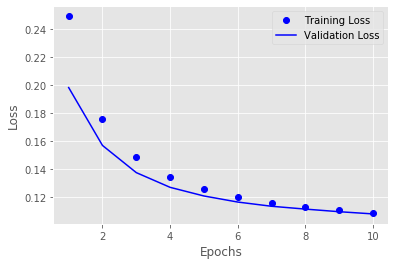

In [0]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo', 
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

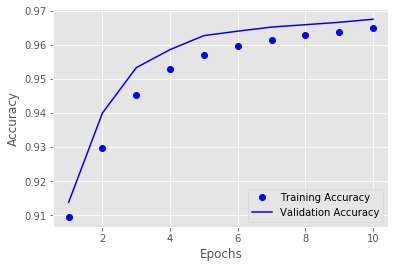

In [0]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', 
         label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b',
         label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

***